<a href="https://colab.research.google.com/github/erbertalvesgomes/data_science/blob/main/Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISE Airbnb - BARCELONA

In [ ]:
# importação dos pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv")


Dicionário das variáveis


*   id - número id gerado para identificar o imóvel
*   name - nome da propriedade anunciada

*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - nome do anfitrião

*   neighbourhood_group - esta coluna contém nenhum valor válido
*   neighbourhood - nome do bairro

*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade

*   room_type - informa o tipo de quarto que é oferecido
*   price _ preço para alugar o imóvel

*   minimium_rights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui

*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês

*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias



















In [ ]:
# ANALISANDO AS 5 PRIMEIRAS ENTRADAS DO DATASET
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


Q1 - Quantas variáveis e quantas entradas o conjunto de dados possui? Quais os tipos dessas variáveis?

In [ ]:
# Identificando o volume de dados do DataFrame
# importação do arquivo para um DataFrame
# importação dos pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df.shape
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

Entradas: 17230
Variáveis: 18


Método shape nos mostra que o arquivo sobre a cidade de Barcelona contém 17.230 entradas e 18 variáveis.

In [ ]:
# Verificando os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

**Q2 - Porcentagem de valores ausentes no dataset**

É indispensável identificar a quantidade de valores ausentes e qual a representatividade dessa quantidade frente ao total de entradas.

In [ ]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000116
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.234010
reviews_per_month                 0.234010
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.485665
dtype: float64

In [ ]:
# Ordenando os valores ausentes de forma decrescente
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

license                           0.485665
reviews_per_month                 0.234010
last_review                       0.234010
host_name                         0.000116
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Analisando o resultado acima:

*   A coluna license apresenta o maior valor de valores ausentes;
*   reviews_per_month e last_review apresentaram o mesmo valor



**Q3 - Tipo de distribuição das variáveis**

Para essa etapa, utiliza-se o histograma

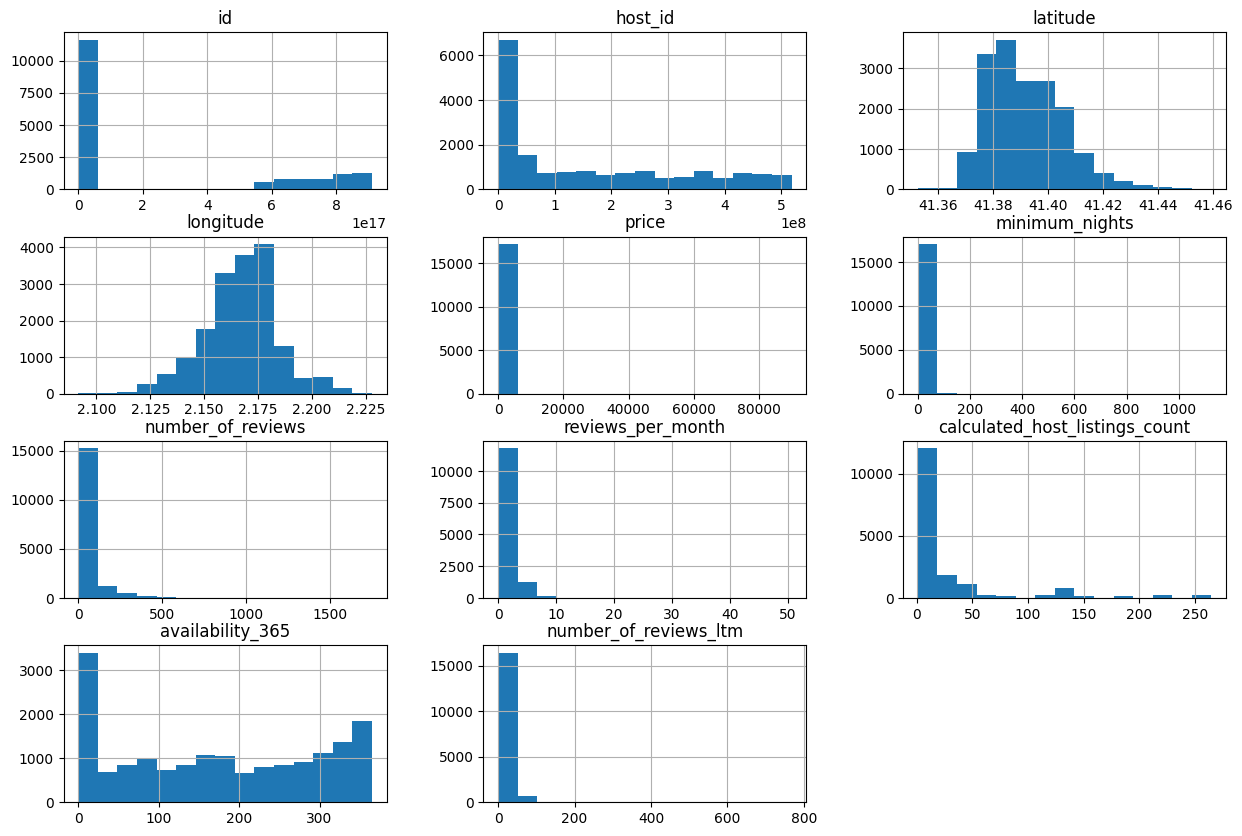

In [ ]:
# Plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize = (15,10));

**Q4 - Presença de outliers?**

*   Pelo resultado do histograma, percebe-se que há indícios de outliers nas variáveis price, review_per_month, number_of_reviews, minimium_nights;

*   Para detecção de outliers usam-se dois métodos que auxiliam (e muito) nisso: describe() para obtermos um resumo estatístico das variáveis e o gráfico boxplot.






In [ ]:
# resumo estatístico das variáveis numéricas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.723000e+04,1.723000e+04,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,2.452457e+17,1.577106e+08,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,3.583623e+17,1.652453e+08,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,1.867400e+04,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.043217e+07,9.536735e+06,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,4.215769e+07,8.489767e+07,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,6.601314e+17,2.871165e+08,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,9.100075e+17,5.185810e+08,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


In [ ]:
# Resumo estatístico de algumas variáveis
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000
mean,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208
std,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000
50%,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000
75%,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000
max,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000


Pelo resumo estatístico, percebe-se que:


*   A variável price representa o primeiro quartil (25%) com valores abaixo de 55, valor mínimo zero e valor máximo 90.000
*   Registro de 31 noites mínimas abaixo do terceiro quartil (75%)


BOXPLOT para minimum_nights


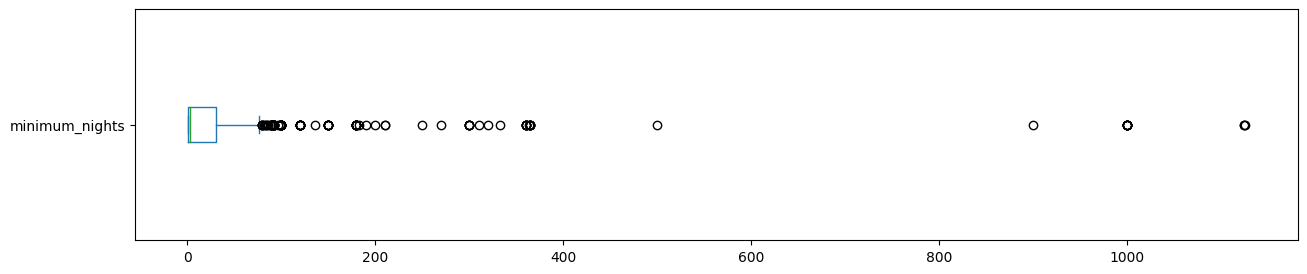

minimum_nights: valores acima de 30 :
Entradas: 5431
valores em termos percentuais 31.52060359837493


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind = "box", vert = False,figsize =(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30 :')
print(f'Entradas: {len(df[df.minimum_nights > 30])}')
print(f'valores em termos percentuais {len(df[df.minimum_nights > 30]) / (df.shape[0])*100}')


**HISTOGRAMA SEM OUTLIERS**

*   Sem as variáveis price e minimum_nights
*   Necessário fazer a limpeza do DataFrame




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv")


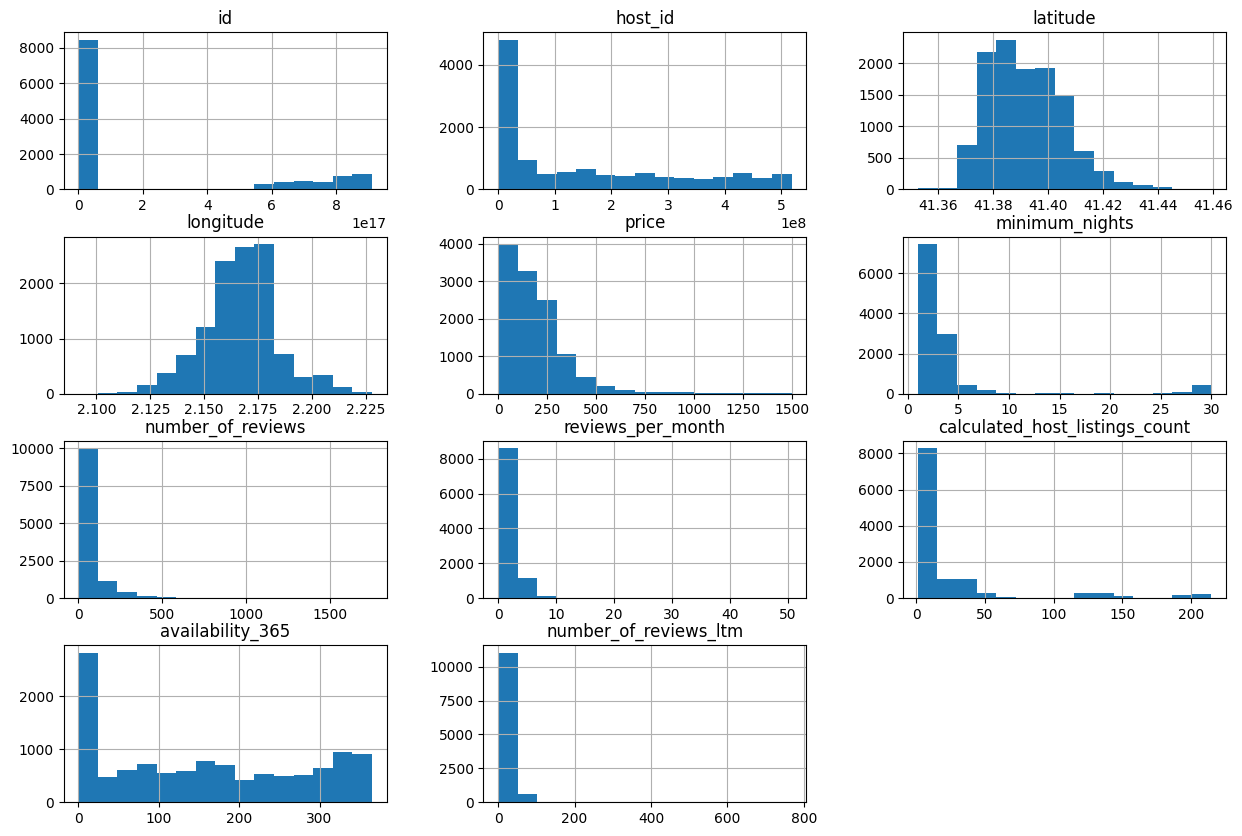

In [ ]:
# removendo os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index,axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace =True)

# plotando o histograma para ver as variáveis numéricas
df_clean.hist(bins =15, figsize =(15,10));


**Q4 - Qual a correlação entre as variáveis**
- O coeficiente de correlação calcula a "força" da relação linear entre as variáveis. Se esse coeficiente for zero ou bem próximo de zero, então não existe uma relação linear entre as variáveis. Importante notar que uma forte correlação (valor do coeficiente bem próximo de 1) não significa causalidade. A correlação mede a relação linear entre duas variáveis, mas não significa que a variação de uma cause a variação na outra.

*   Criar Matriz de Correlação;
*   Gráfico Heatmap via biblioteca Seaborn





In [ ]:
# matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.112009,0.087776,-0.003315,0.246143,0.287423
minimum_nights,-0.112009,1.000000,-0.084411,-0.140818,-0.097128,0.002902
number_of_reviews,0.087776,-0.084411,1.000000,0.475380,-0.082569,0.100158
reviews_per_month,-0.003315,-0.140818,0.475380,1.000000,-0.041556,0.172099
calculated_host_listings_count,0.246143,-0.097128,-0.082569,-0.041556,1.000000,0.215440
availability_365,0.287423,0.002902,0.100158,0.172099,0.215440,1.000000


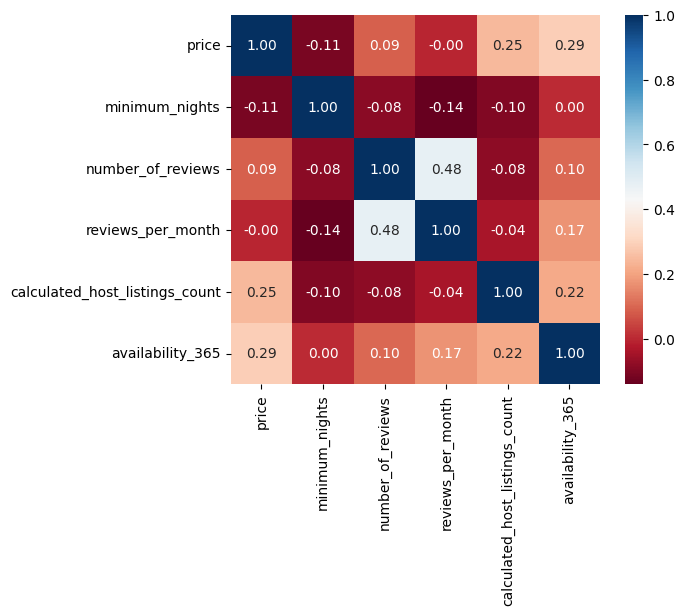

In [ ]:
sns.heatmap(corr,cmap = 'RdBu',fmt = '.2f',square = True, linecolor ='white',annot = True);

**Q5 - Qual o tipo de imóvel mais alugado no Airbnb?**


*   Por meio da variável room_type conseguimos identificar o tipo de quarto anunciado no site;
*   Por meio do método value_counts(), conseguimos ver a quantidade de ocorrências de cada tipo de aluguel.



In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv")


In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index,axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace =True)
# Quantidade de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    6773
Private room       4722
Hotel room          139
Shared room         128
Name: room_type, dtype: int64

In [ ]:
# Ver em termos percentuais
(df_clean.room_type.value_counts()/df_clean.shape[0])*100


Entire home/apt    57.583744
Private room       40.146234
Hotel room          1.181772
Shared room         1.088250
Name: room_type, dtype: float64

Pela análise acima, identificam-se que os valores de Entire home/apt e Private room apresentam maiores resultados, haja vista Barcelona ser uma cidade muito visitada.

**Localidade mais cara em Barcelona**

*   Por meio do método groupby() conseguimos ver uma variável em função da outra. Aqui iremos comparar bairros (neighbourhoods) a partir da média de preço de locação (10 maiores preços).






In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
la Font d'en Fargues                            298.000000
la Vila Olímpica del Poblenou                   277.889908
la Dreta de l'Eixample                          275.040974
Diagonal Mar i el Front Marítim del Poblenou    258.690000
l'Antiga Esquerra de l'Eixample                 221.937135
la Marina del Prat Vermell                      210.875000
la Sagrada Família                              210.523240
el Coll                                         207.238095
el Fort Pienc                                   202.472973
Sant Antoni                                     200.110769
Name: price, dtype: float64

Pela análise acima, vemos que os bairros La Font d'en Fargues, La Vila Olímpica del Poblenou e La Dreta de l'Eixample possuem os maiores preços. Importante notar que não há muita diferença do segundo para o décimo. Detalhe importante sobre os três primeiros e os três últimos: todos estão próximos ao bairro Les Corts onde fica o estádio do FC Barcelona - Camp Nou, que é um dos principais pontos turísticos da Catalunha. El Fort Pienc está apenas a 5 km  do estádio, La Font d'en Fargues está a 10 km, mas é o mais caro em virtude de ser o mais nobre de todos.

In [ ]:
# quantidade de imóveis no la Font d'en Fargues:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv")
df_clean = df.copy()
print(df_clean[df_clean.neighbourhood == "la Font d'en Fargues"].shape)


(12, 18)


In [ ]:
# ver as 3 entradas de la Font d'en Fargues
df_clean[df_clean.neighbourhood=="la Font d'en Fargues"].head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
291,694516,Condo in Barcelona · ★4.87 · 1 bedroom · 2 bed...,3019128,Roser,Horta-Guinardó,la Font d'en Fargues,41.42593,2.16748,Entire home/apt,38,31,56,2023-05-28,0.43,1,66,3,Exempt
1465,4200509,Villa in Barcelona · ★4.93 · 8 bedrooms · 15 b...,21793560,Imanol,Horta-Guinardó,la Font d'en Fargues,41.42733,2.16566,Entire home/apt,1438,1,28,2023-03-20,0.27,6,346,6,HUTB-001101
1981,6937825,Rental unit in Barcelona · ★4.71 · 1 bedroom ·...,5501549,Toni,Horta-Guinardó,la Font d'en Fargues,41.42128,2.16910,Private room,30,32,8,2022-06-24,0.11,2,365,1,NaN


Plotando os imóveis por x = Longitude e y = Latitude


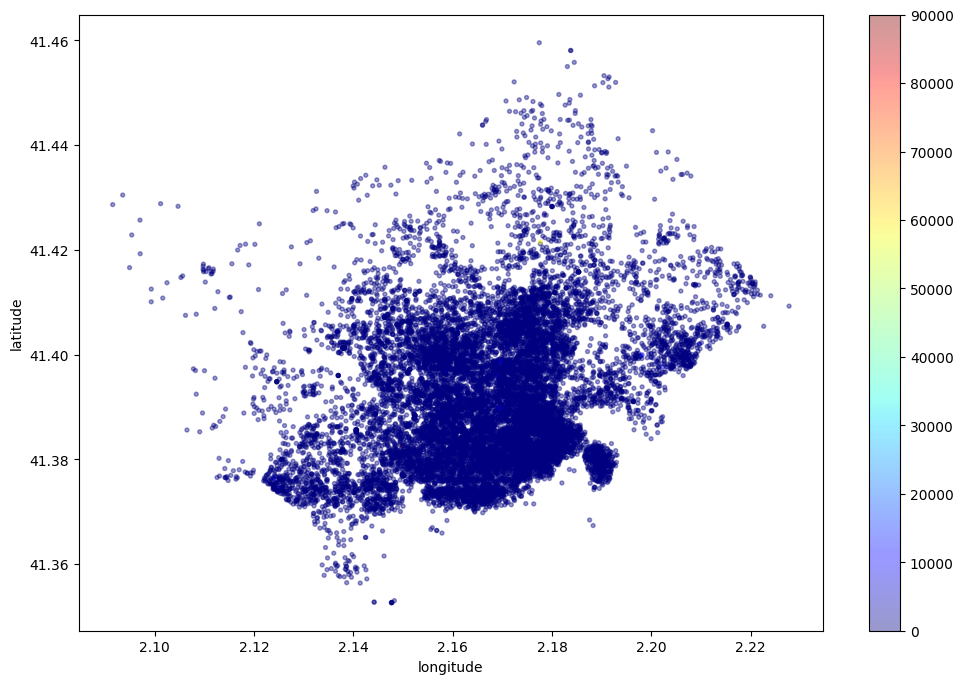

In [ ]:
df_clean.plot(kind ='scatter', x='longitude', y = 'latitude', alpha =0.4, c=df_clean['price'],s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**CONCLUSÃO**

O arquivo utilizado para o desenvolvimento desse projeto é o do tipo resumido, mas consegue-se obter grandes insights para fins de análise, como por exemplo, preço, tipos de imóveis, onde o aluguel é mais caro e etc.

Aqui conseguiu-se ver que os bairros La Font d'en Fargues, La Vila Olímpica del Poblenou e La Dreta de l'Eixample apresentaram os maiores preços.